In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import fetch_openml
import numpy as np
from Plotter import Plotter

from FFNN import FFNN

In [2]:
def preprocess_mnist(num_samples=20000):
    mnist = fetch_openml('mnist_784', version=1, as_frame=False)
    X = mnist.data
    y = mnist.target.astype(np.int32)
    
    np.random.seed(42)
    indices = np.random.choice(len(X), num_samples, replace=False)
    X = X[indices]
    y = y[indices]
    
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    
    y_one_hot = np.zeros((len(y), 10))
    y_one_hot[np.arange(len(y)), y] = 1
    
    X_train, X_temp, y_train, y_temp = train_test_split(X, y_one_hot, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    
    return X_train, X_val, X_test, y_train, y_val, y_test

In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test = preprocess_mnist(num_samples=10000)

ffnn = FFNN(
    input_size=784,
    hidden_sizes=[256, 128],
    output_size=10,
    learning_rate=0.001,
    hidden_activations=['relu', 'relu'],
    output_activation='softmax',
    loss_function='cce',
    reg_type='l2',
    reg_lambda=0.001,
    rms_norm=True,
    init_type='he'
)
ffnn.train(X_train, y_train, X_val, y_val, epochs=30, batch_size=32, verbose=1)

correct = 0
for inputs, target in zip(X_test, y_test):
    prediction = ffnn.predict(inputs)
    predicted_class = np.argmax(prediction)
    actual_class = np.argmax(target)
    if predicted_class == actual_class:
        correct += 1

print(f"Akurasi: {correct / len(y_test) * 100:.2f}%")

In [ ]:
ffnn.compare_lib(X_train, y_train, X_test, y_test)

Accuracy FFNN: 92.27%
Accuracy MLP Sklearn: 93.40%


/home/qika/Code/Python Env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


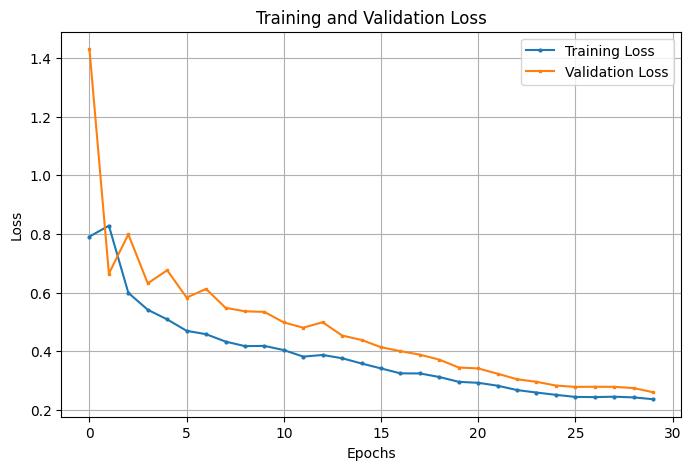

In [ ]:
plotter = Plotter()
plotter.plot_training_history(ffnn)

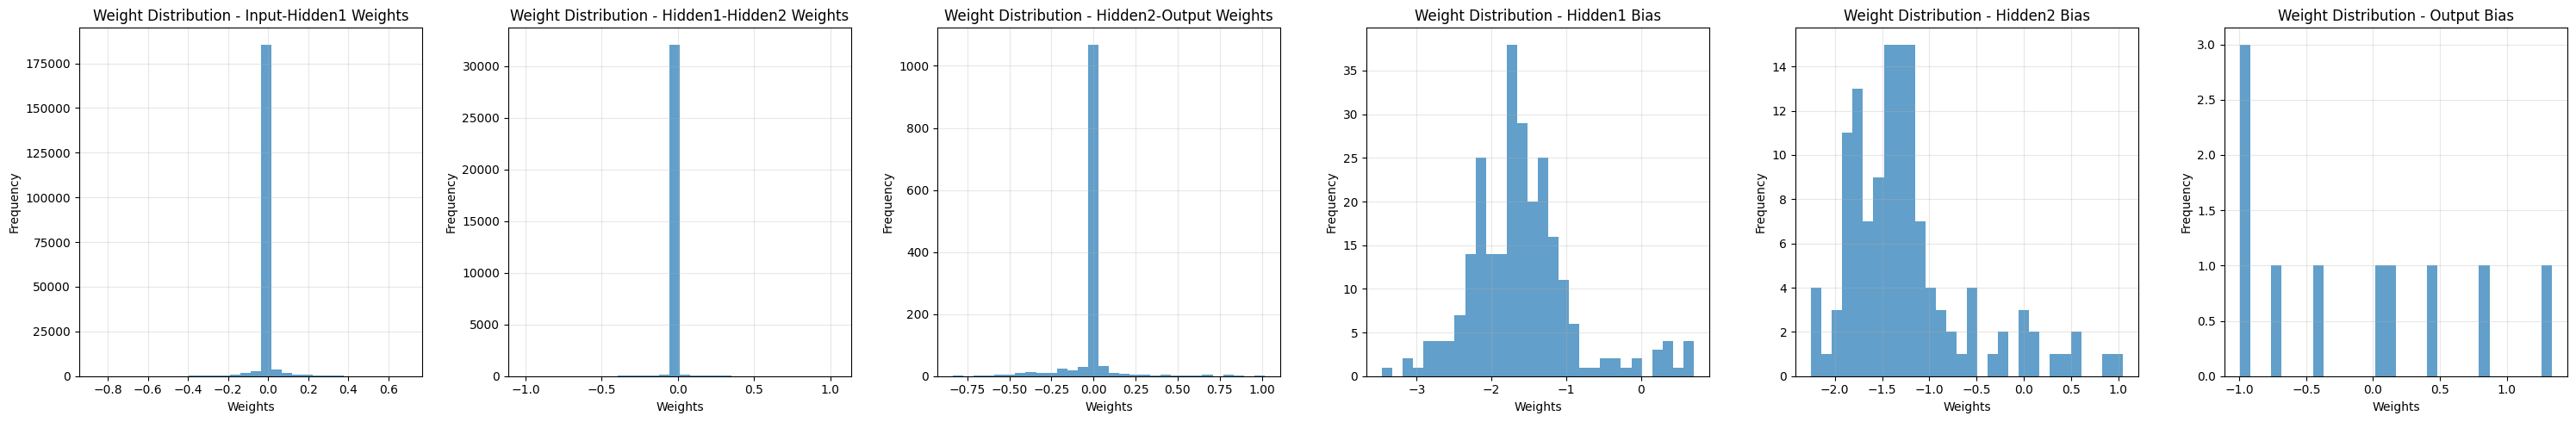

In [ ]:
plotter.plot_weight_distributions(ffnn)

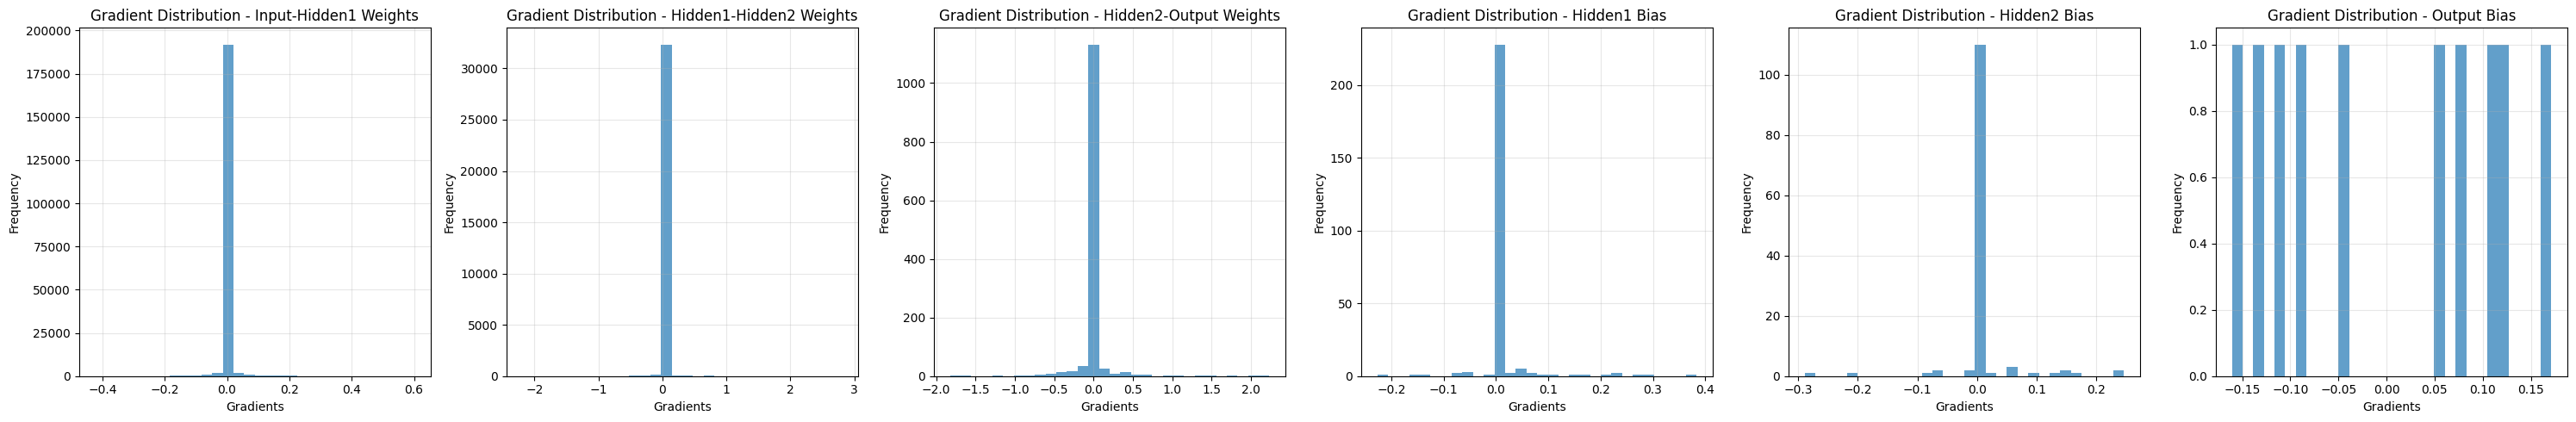

In [ ]:
plotter.plot_gradient_distributions(ffnn)

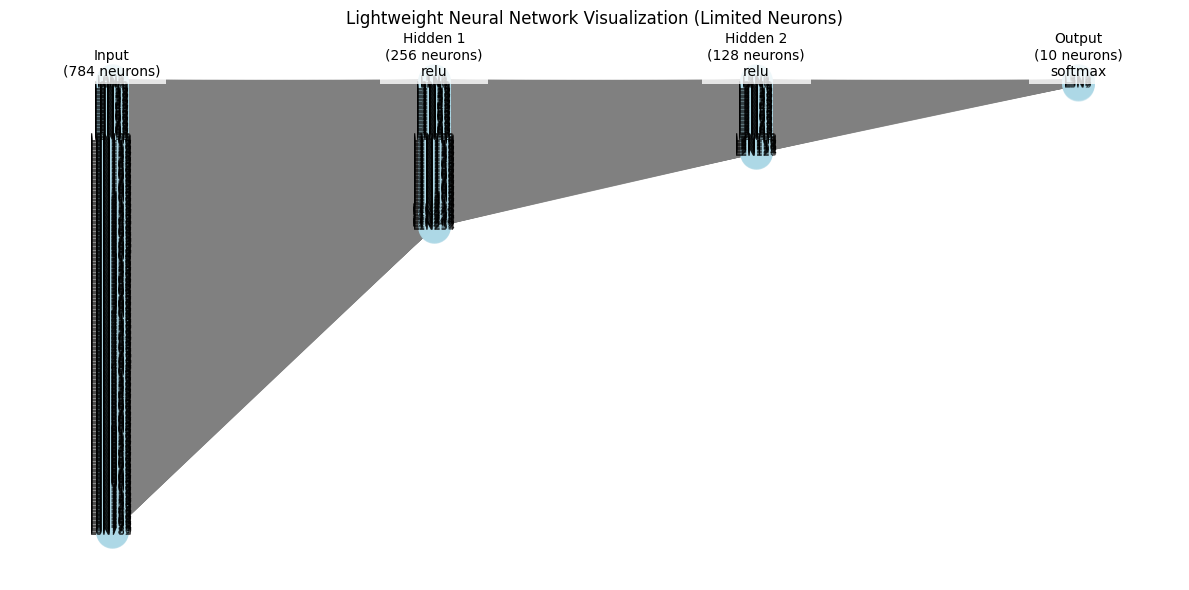

In [ ]:
plotter.visualize_network_light(ffnn, 1000)

In [ ]:
ffnn.save_model()

Model saved to /home/qika/Documents/Projects/Tubes1_ML_51/ffnn_model.npz
